In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [2]:
cal1 = np.loadtxt("data/simple/calibracion_1ms.dat")
cal2 = np.loadtxt("data/simple/calibracion_2ms.dat")
cal5 = np.loadtxt("data/simple/calibracion_5ms.dat")
rabi = np.loadtxt("data/simple/RabiOsc_SBC_carrier_tobs=2ms.dat")

### Graficamos los datos de calibración

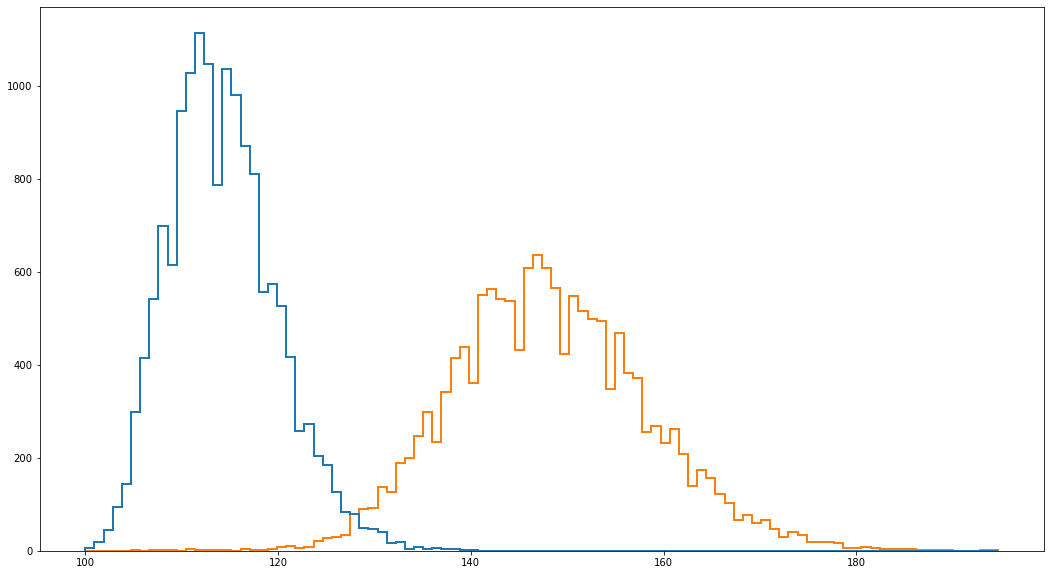

In [3]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal1, bins=100, histtype="step", linewidth=2)
plt.show()

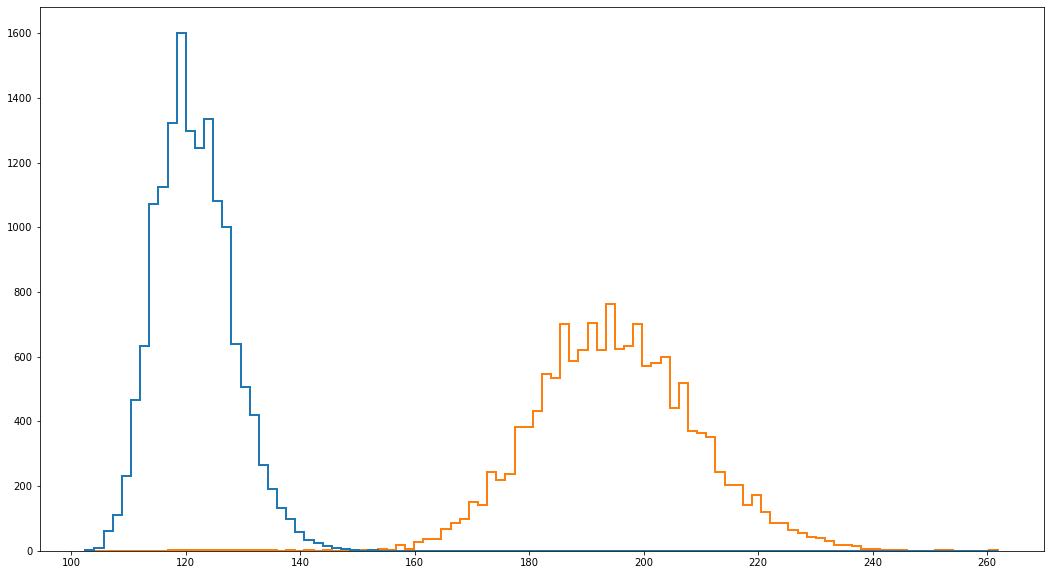

In [4]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal2, bins=100, histtype="step", linewidth=2)
plt.show()

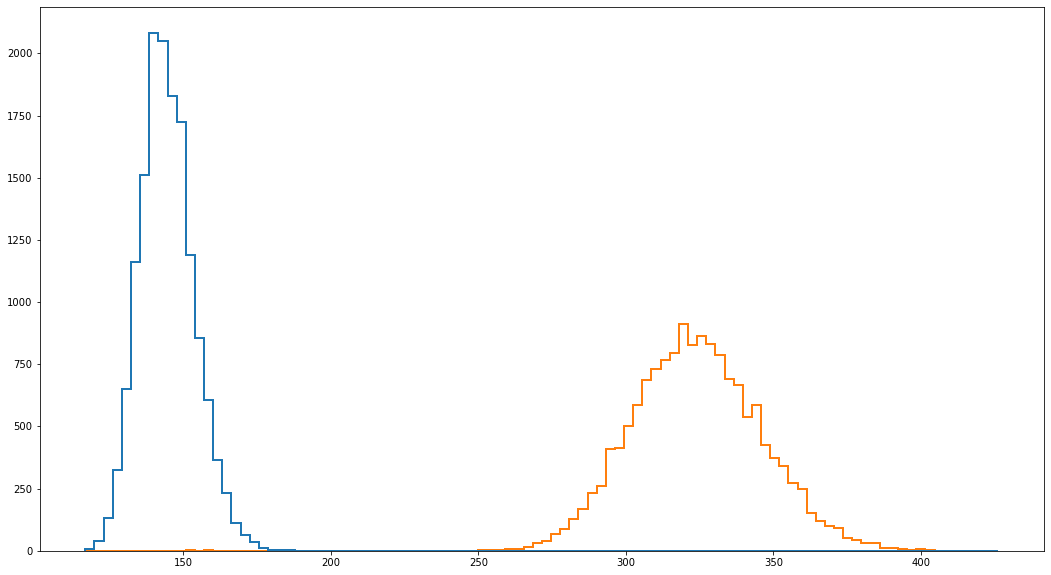

In [5]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal5, bins=100, histtype="step", linewidth=2)
plt.show()

### Defino dist de Poisson y factorial

In [6]:
def factorial(arr):
    salida = np.ones(arr.shape[0])
    for index, num in enumerate(arr):
        for i in range(1, num+1):
            salida[index] *= i
    return salida

def poisson_mio(datos, lmb):
    num =  np.exp(-lmb) * lmb**datos
    den = factorial(datos)
    return num/den



# Fitteamos Poisson a mano para la calibración 5

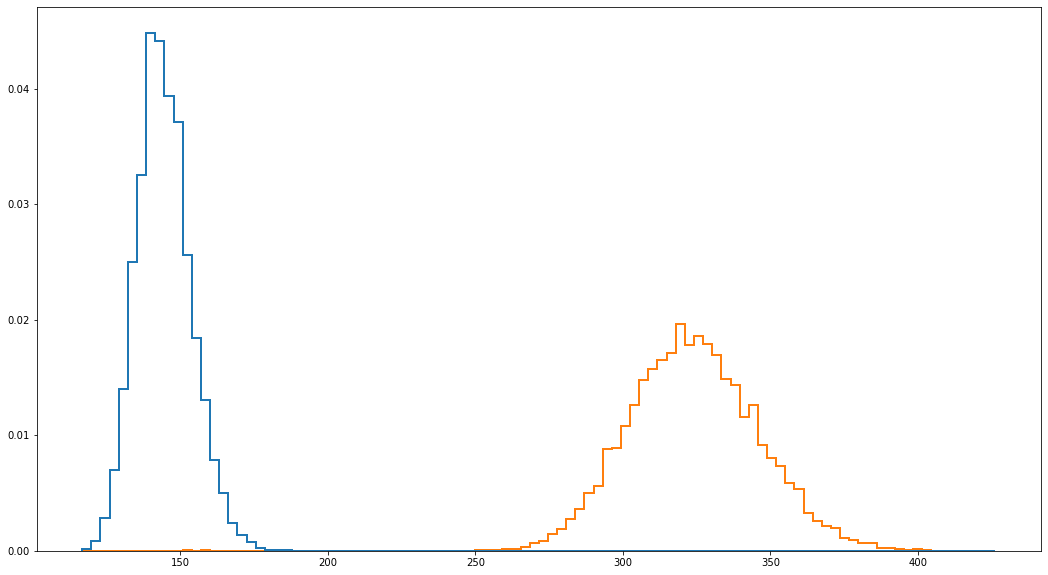

In [55]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal5, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

In [56]:
# print(bins)
# print(n0, n1)
# print(np.diff(bins))
# sum1 = 0
# sum2 = 0
# for i in range(len(n0)):
#     sum1 += n0[i]*np.diff(bins)[i]
#     sum2 += n1[i]*np.diff(bins)[i]
# escala_y = sum1

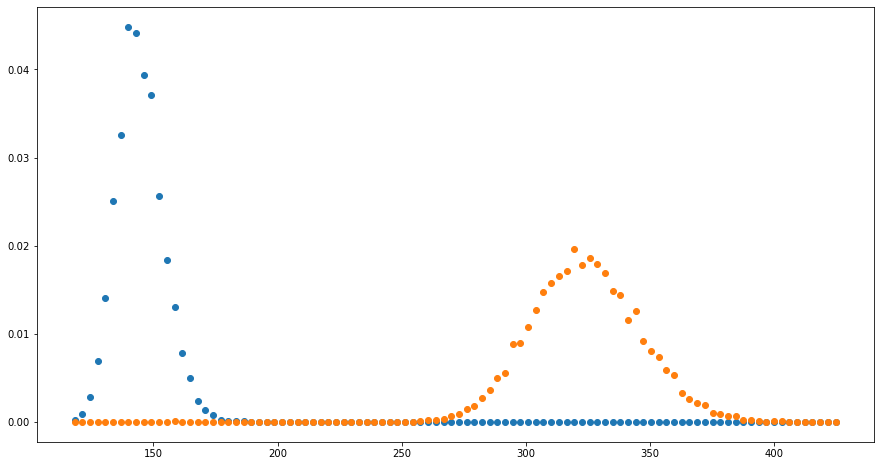

In [57]:
x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1

fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x, y0, 'o')
plt.plot(x, y1, 'o')
plt.show()

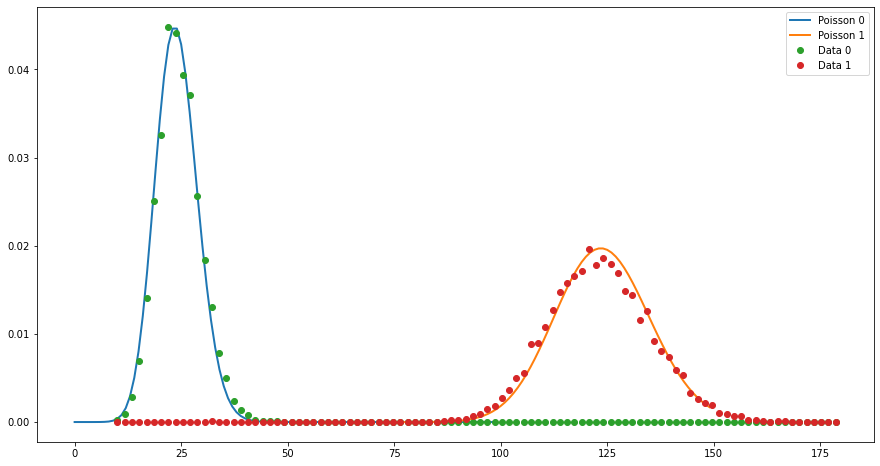

(24, 124)

In [60]:
#%matplotlib widget





# mu0 = sum(x*n0/escala_y)
# mu1 = sum(x*n1/escala_y)
mu0 = 24
mu1 = 124
x_poisson0 = np.arange(0, 100, 1, dtype=int)
x_poisson1 = np.arange(75, 150, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)
scale_y = 1
scale_x = 0.55
offset = 100

fig, ax = plt.subplots(1, figsize=(15,8),facecolor = 'w')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)
ax.plot()

ax.plot((x-offset)*scale_x , y0/scale_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1/scale_y, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion5.png')
plt.show()
mu0, mu1

# Fitteamos Poisson a mano para la medición 2

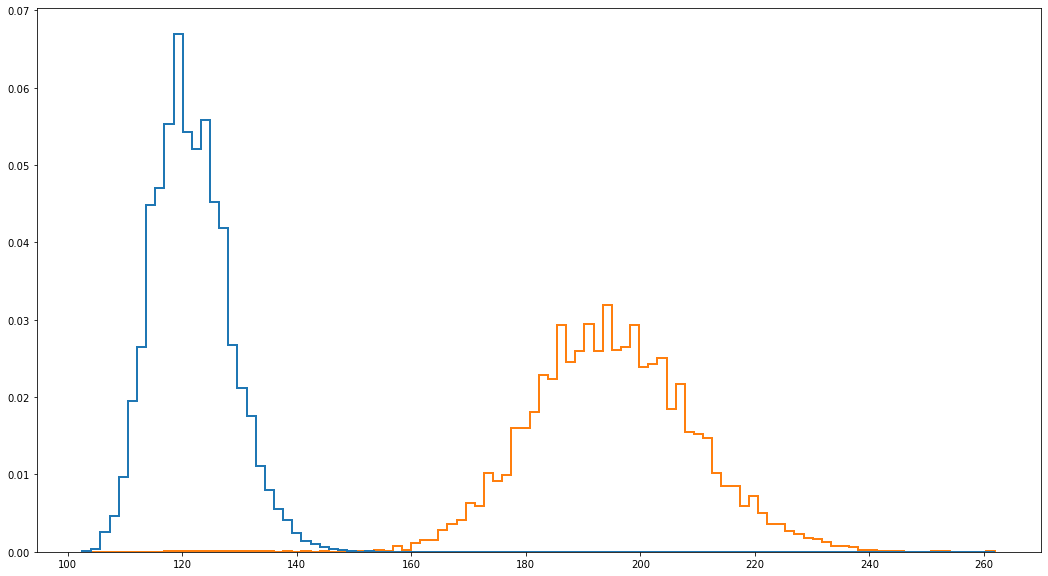

In [61]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal2, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

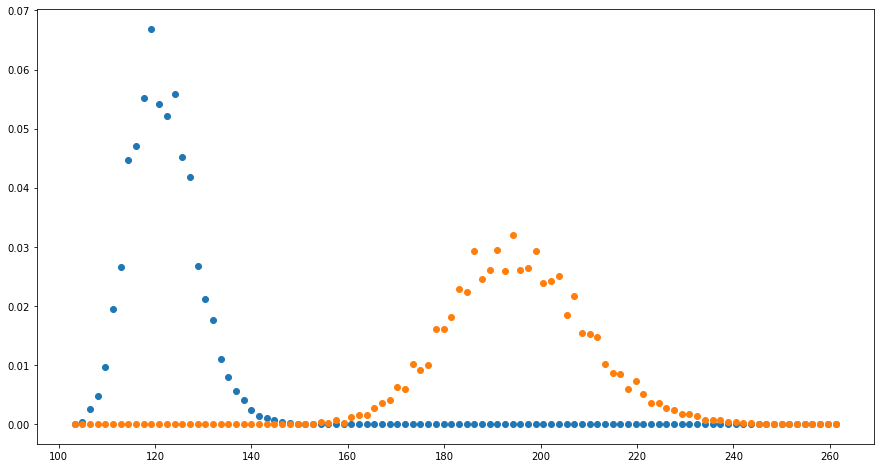

In [62]:
x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1

fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x, y0, 'o')
plt.plot(x, y1, 'o')
plt.show()

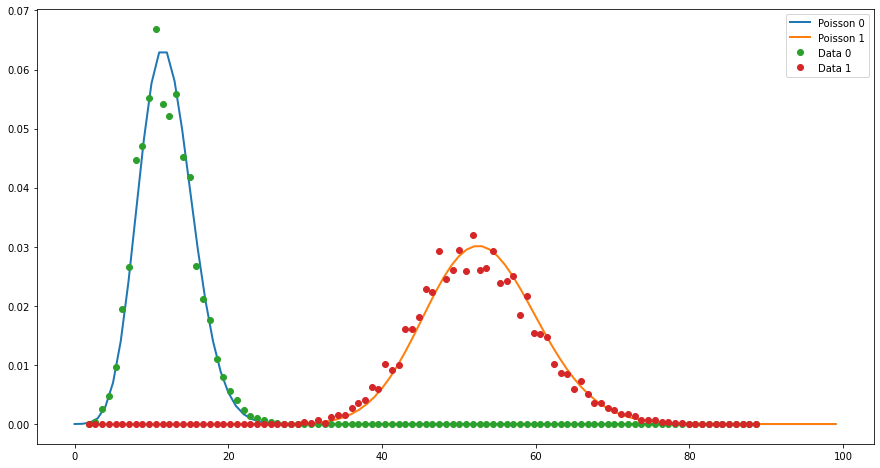

In [64]:
mu0 = 12
mu1 = 53
x_poisson0 = np.arange(0, 100, 1, dtype=int)
x_poisson1 = np.arange(20, 100, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)-10
# sum1 = 0
# sum2 = 0
# for i in range(len(n0)):
#     sum1 += n0[i]*np.diff(bins)[i]
#     sum2 += n1[i]*np.diff(bins)[i]

#escala_y = sum1+sum2
escala_y =1
scale_y = 1
scale_x = 0.55
offset = 100

fig, ax = plt.subplots(1, figsize=(15,8), facecolor ='white')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)

ax.plot((x-offset)*scale_x, y0/escala_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1/escala_y, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion2.png')
plt.show()


# Ajuste de calibración 1

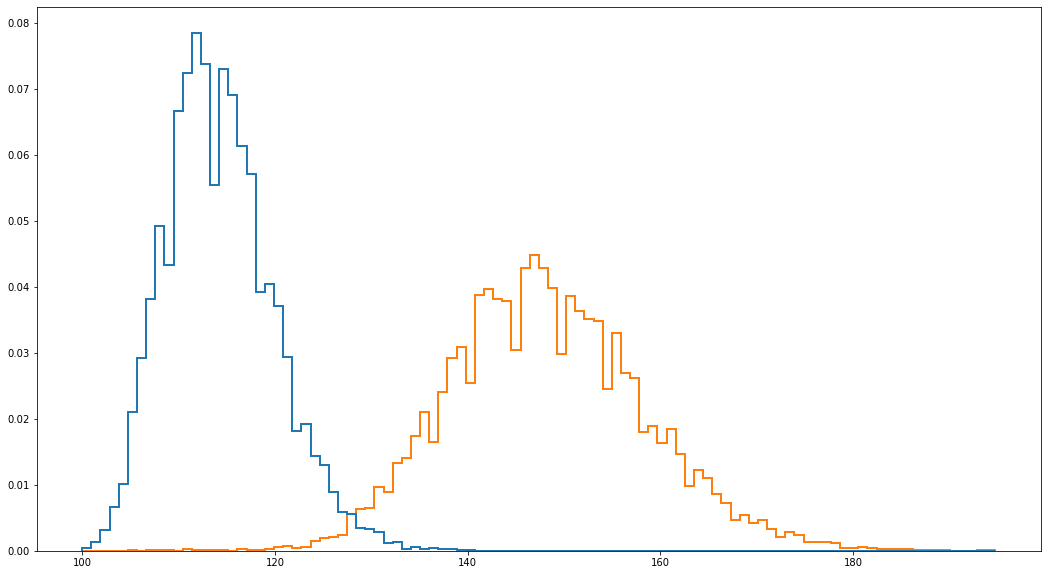

In [65]:
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal1, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1


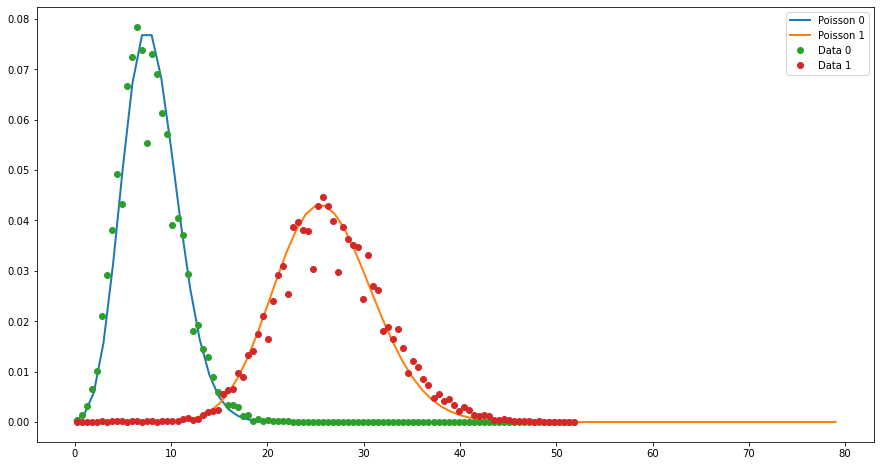

In [66]:
mu0 = 8
mu1 = 26
x_poisson0 = np.arange(0, 32, 1, dtype=int)
x_poisson1 = np.arange(10, 80, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)-10
sum1 = 0
sum2 = 0
for i in range(len(n0)):
    sum1 += n0[i]*np.diff(bins)[i]
    sum2 += n1[i]*np.diff(bins)[i]

#escala_y = sum1+sum2
escala_y = 1
scale_y = escala_y
scale_x = 0.55
offset = 100

fig, ax = plt.subplots(1, figsize=(15,8), facecolor ='white')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)

ax.plot((x-offset)*scale_x, y0/escala_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1/escala_y, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion2.png')
plt.show()

# Prueba a ver si sale

In [301]:
c1 = cal1.transpose()
c2 = cal2.transpose()
c5 = cal5.transpose()

gain = 0.55
offset = 1

x = bins[:-1] + np.diff(bins)/2

x = (x-offset)*gain
c5[0] = c5[0]/c5[0].sum()
c5[1] = c5[1]/c5[1].sum()

darkmean = (sum(x*c5[0]))
plt.step(x, c5[0]*gain)
plt.plot(x, poisson.pmf(x, darkmean), 'r')

brightmean= (sum(x*c5[1]))
plt.step(x, c5[1]*gain)
plt.plot(x_poisson, poisson.pmf(x_poisson, brightmean), 'b')


ValueError: operands could not be broadcast together with shapes (100,) (15000,) 